In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 30)

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 1. 데이터 불러오기

In [2]:
path = os.getenv('HOME')+'/aiffel/DuSiData/data/'
file_list = os.listdir(path)
file_list

['test.csv', 'sample_submission.csv', 'train.csv']

In [3]:
test = pd.read_csv(path+file_list[0])
train = pd.read_csv(path+file_list[2])
sub = pd.read_csv(path+file_list[1])

# 2. EDA

## 변수 자료형 및 의미

- `index`와 목적 변수 `credit`을 제외하면 변수 개수는 18개이다.

In [4]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

- `occyp_type`에만 결측치가 있다.
- 타 변수와 결합해서 채워보자

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [6]:
train.head()
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [7]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


## 변수 의미 및 범위 정리

|컬럼명|의미|값범위|
|-----|-------------------------------|-------------------------|
|gender|성별|F/M|
|car|차 소유여부|N/Y|
|reality|부동산 소유여부|N/Y|
|child_num|자녀수|0~19|
|income_total|총 소득| 27000.0 ~ 1575000.0 |
|income_type|수입 유형|'Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student'|
|edu_type|최종학력|'Higher education' 'Secondary / secondary special' 'Incomplete higher' 'Lower secondary' 'Academic degree'|
|family_type|가족 유형|'Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow'|
|house_type|주거 유형|'Municipal apartment' 'House / apartment' 'With parents' 'Co-op apartment' 'Rented apartment' 'Office apartment'|
|DAYS_BIRTH|생년월일(데이터 수집 시점으로 부터 며칠 전인지)| -25152 ~ -7705 |
|DAYS_EMPLOYED|고용일자(데이터 수집 시점으로 부터 며칠 전인지) 직업이 없으면 365243| -15713 ~ 365243 |
|FLAG_MOBIL|휴대전화 소유 여부|1|
|work_phone|업무용 전화 소유 여부|0,1|
|phone|가정용 전화 소유 여부|0,1|
|email|이메일 여부|0,1|
|occyp_type|고용 유형|nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff' 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents' 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff' 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers' 'Waiters/barmen staff'|
|family_size|가족 크기| 1.0 ~ 20.0 |
|begin_month|카드 사용 시작 월| -60.0 ~ 0.0 |
|credit|신용도(낮을 수록 좋음)| 0.0,1.0,2.0 |

- `FLAG_MOBIL`은 모든 데이터가 다 1이어서 삭제해도 될 듯 하다.

### 범주형 변수

In [38]:
categoric = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type','FLAG_MOBIL', 'work_phone','phone','email']

In [17]:
for col in numeric:
    print(f'{col} : ',train[col].min(),'~',train[col].max())
    print(f'{col} 평균 ',train[col].mean())

child_num :  0 ~ 19
child_num 평균  0.42865782212646936
income_total :  27000.0 ~ 1575000.0
income_total 평균  187306.52449257285
DAYS_BIRTH :  -25152 ~ -7705
DAYS_BIRTH 평균  -15958.053898779151
DAYS_EMPLOYED :  -15713 ~ 365243
DAYS_EMPLOYED 평균  59068.75072759572
family_size :  1.0 ~ 20.0
family_size 평균  2.196847715160449
begin_month :  -60.0 ~ 0.0
begin_month 평균  -26.123294402237594
credit :  0.0 ~ 2.0
credit 평균  1.5195600408209549


In [17]:
for col in numeric:
    print(f'{col} : ',train[col].min(),'~',train[col].max())
    print(f'{col} 평균 ',train[col].mean())

child_num :  0 ~ 19
child_num 평균  0.42865782212646936
income_total :  27000.0 ~ 1575000.0
income_total 평균  187306.52449257285
DAYS_BIRTH :  -25152 ~ -7705
DAYS_BIRTH 평균  -15958.053898779151
DAYS_EMPLOYED :  -15713 ~ 365243
DAYS_EMPLOYED 평균  59068.75072759572
family_size :  1.0 ~ 20.0
family_size 평균  2.196847715160449
begin_month :  -60.0 ~ 0.0
begin_month 평균  -26.123294402237594
credit :  0.0 ~ 2.0
credit 평균  1.5195600408209549


In [22]:
for col in categoric:
    print(f'======== {col} 범주 종류 ========\n',train[col].unique())

======== gender 범주 종류 ========
 ['F' 'M']
======== car 범주 종류 ========
 ['N' 'Y']
======== reality 범주 종류 ========
 ['N' 'Y']
======== income_type 범주 종류 ========
 ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
======== edu_type 범주 종류 ========
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
======== family_type 범주 종류 ========
 ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
======== house_type 범주 종류 ========
 ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
======== occyp_type 범주 종류 ========
 [nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']
======== FLAG_MOBIL 범주 종류 =====

- 범주 개수가 적은 값들 끼리 시각화를 하자.

In [45]:
few_catogries = [cat for cat in train.columns if train[cat].nunique()<3]
few_catogries

['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone', 'email']

<AxesSubplot:xlabel='gender', ylabel='count'>

Text(0.5, 1.0, 'gender')

<AxesSubplot:xlabel='car', ylabel='count'>

Text(0.5, 1.0, 'car')

<AxesSubplot:xlabel='reality', ylabel='count'>

Text(0.5, 1.0, 'reality')

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='count'>

Text(0.5, 1.0, 'FLAG_MOBIL')

<AxesSubplot:xlabel='work_phone', ylabel='count'>

Text(0.5, 1.0, 'work_phone')

<AxesSubplot:xlabel='phone', ylabel='count'>

Text(0.5, 1.0, 'phone')

<AxesSubplot:xlabel='email', ylabel='count'>

Text(0.5, 1.0, 'email')

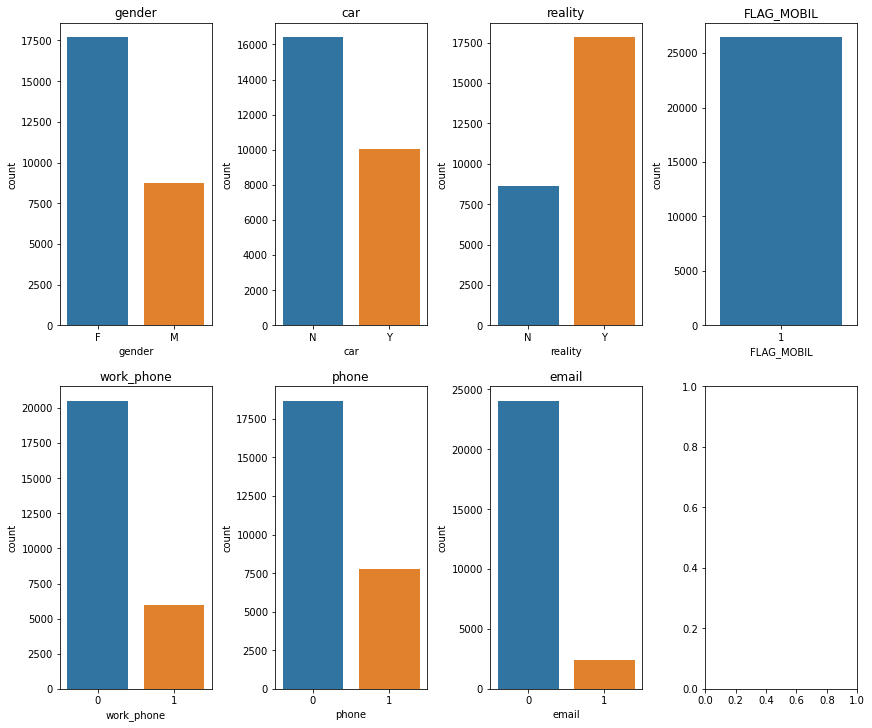

In [46]:
fig, ax = plt.subplots(2,4, figsize=(12,10), constrained_layout=True)
count = 0
for row in range(2):
    for col in range(4):
        if count == len(few_catogries): break
        sns.countplot(train[few_catogries[count]], ax=ax[row][col])
        ax[row][col].set_title(few_catogries[count])
        count += 1
plt.show()

- 여성 > 남성
- 차 미보유 > 차 보유
- 부동산 보유 > 부동산 미보유
- 업무용 전화 미보유 > 업무용 전화 보유
- 집 전화 미보유 > 집 전화 보유
- 이메일 미보유 > 이메일 보유

In [52]:
else_categories = [col for col in categoric if col not in few_catogries]
else_categories

['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='income_type', ylabel='count'>

Text(0.5, 1.0, 'income_type')

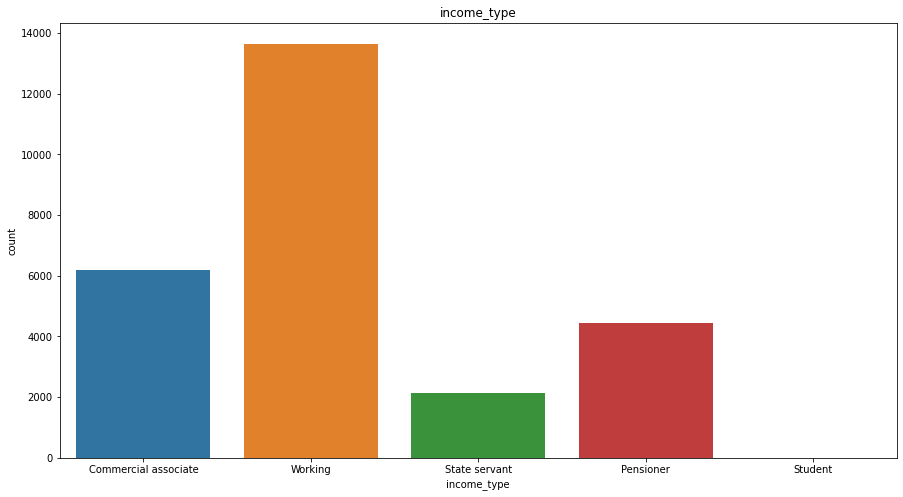

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='edu_type', ylabel='count'>

Text(0.5, 1.0, 'edu_type')

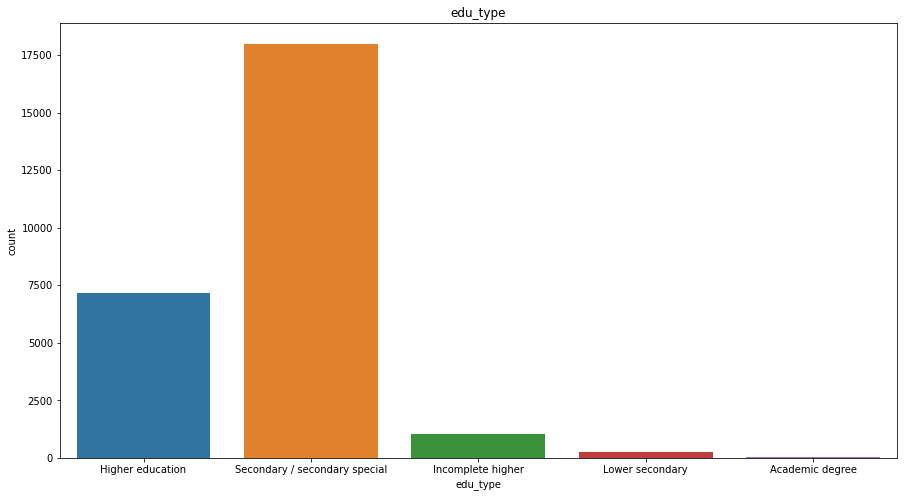

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='family_type', ylabel='count'>

Text(0.5, 1.0, 'family_type')

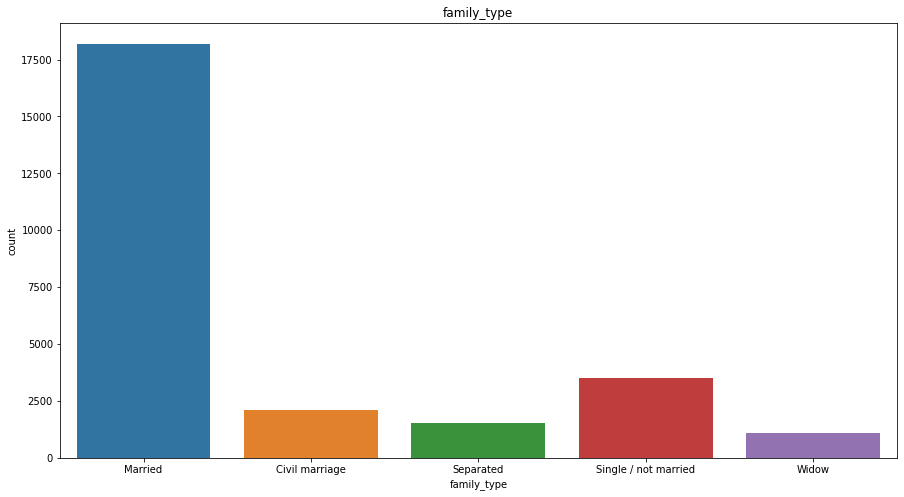

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='house_type', ylabel='count'>

Text(0.5, 1.0, 'house_type')

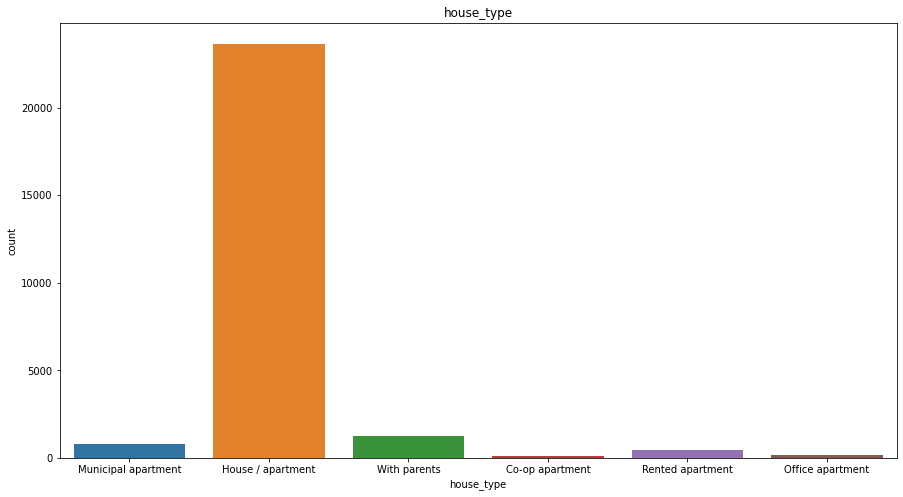

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

Text(0.5, 1.0, 'occyp_type')

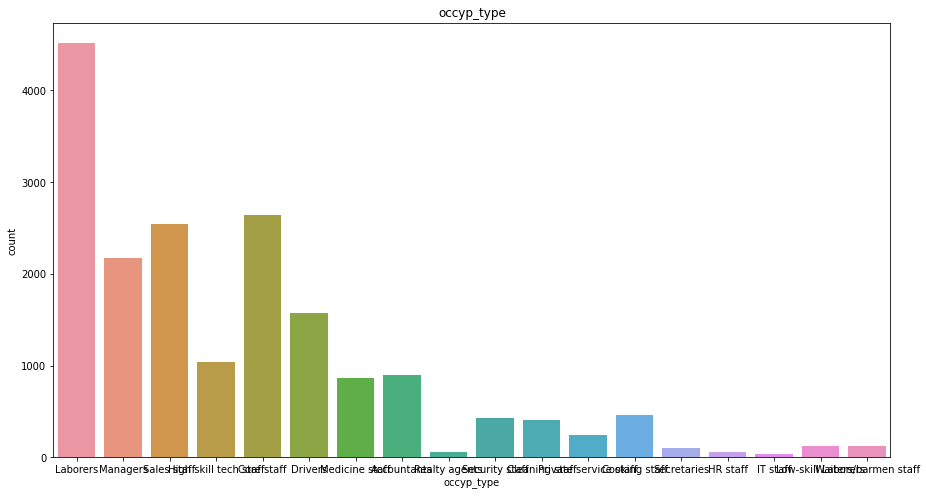

In [72]:
for row in range(5):
    plt.figure(figsize=(15,8))
    sns.countplot(train[else_categories[row]])
    plt.title(else_categories[row])
    plt.show()

- 소득 유형은 `Working`이 가장 많다
- 최종 학력은 `Secondary/ secondary special`이 가장 많다
- 가족 유형은 `Marriged`가 가장 많다. 그 뒤를 `Single/ not married`가 뒤따르고 있다.
- 주거 유형은 `House/ apartment`가 가장 많다.
- 직업 유형은 `Laborers`가 가장 많았고 그 뒤를 `Core Staff`와 `Sales Staff`가 이었다.

- 수입 형태
    - 'Commercial associate' : 사업 소득? 은행?
    - 'Working' : 근로 중
    - 'State servant' : 공무원
    - 'Pensioner': 연금 수급자 -> `occyp_type`에 nan이 절대적으로 많았음
    - 'Student' : 학생 신분
- 최종학력

    - 'Academic degree' : 학사 이상
    - 'Higher education' : 고등 교육
    - 'Incomplete higher' : 고등 교육 중퇴
    - 'Secondary / secondary special' : 중등교육
    - 'Lower secondary' : 중졸 이하
- 가족 유형

    - 'Married' : 기혼
    - 'Civil marriage' : 사실혼
    - 'Separated' : 별거
    - 'Single / not married' : 싱글
    - 'Widow': 사별

- 주거유형

    - 'Municipal apartment' : 공공 주택 (SH, LH 느낌)
    - 'House / apartment' : 집
    - 'With parents' : 부모님 집
    - 'Co-op apartment' : 공동 주택 (하우스쉐어)
    - 'Rented apartment' : 전세
    - 'Office apartment' : 오피스텔

- 고용 유형
    - nan
    - 'Laborers' : 노동자
    - 'Managers' : 관리자
    - 'Sales staff' : 판매원
    - 'High skill tech staff' : 고급 기술자
    - 'Core staff' : 임원
    - 'Drivers' : 운전기사
    - 'Medicine staff' : 의료계 종사자
    - 'Accountants' : 회계사
    - 'Realty agents' : 부동산 종사자
    - 'Security staff' : 보안
    - 'Cleaning staff' : 청소 종사자
    - 'Private service staff' :
    - 'Cooking staff' : 요식업계 종사자
    - 'Secretaries' : 비서
    - 'HR staff' : 인사
    - 'IT staff' : IT 종사자
    - 'Low-skill Laborers' : 하급 노동자
    - 'Waiters/barmen staff' : 종업원

### 수치형 변수

In [28]:
# 범주형 변수가 아니었던 변수
numeric =  [col for col in train.columns if col not in categoric]
# index 변수는 제거
del numeric[0]
# 목적변수 credit도 제거
del numeric[-1]
numeric

['child_num',
 'income_total',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'family_size',
 'begin_month']

In [29]:
for col in numeric:
    print(f'{col} : ',train[col].min(),'~',train[col].max())
    print(f'{col} 평균 ',train[col].mean())

child_num :  0 ~ 19
child_num 평균  0.42865782212646936
income_total :  27000.0 ~ 1575000.0
income_total 평균  187306.52449257285
DAYS_BIRTH :  -25152 ~ -7705
DAYS_BIRTH 평균  -15958.053898779151
DAYS_EMPLOYED :  -15713 ~ 365243
DAYS_EMPLOYED 평균  59068.75072759572
family_size :  1.0 ~ 20.0
family_size 평균  2.196847715160449
begin_month :  -60.0 ~ 0.0
begin_month 평균  -26.123294402237594


In [30]:
for col in numeric:
    train[col].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
227250.0       1
91530.0        1
39600.0        1
432000.0       1
215100.0       1
Name: income_total, Length: 249, dtype: int64

-12676    40
-15519    38
-14667    32
-15140    26
-16768    24
          ..
-23117     1
-21070     1
-11175     1
-15269     1
-19490     1
Name: DAYS_BIRTH, Length: 6621, dtype: int64

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-5095         1
-3294         1
-1045         1
-7192         1
-12278        1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

-7.0     662
-11.0    617
-8.0     612
-3.0     593
-10.0    591
        ... 
-58.0    244
-59.0    242
-60.0    235
 0.0     231
-57.0    228
Name: begin_month, Length: 61, dtype: int64

In [12]:
len(categoric)

12

<AxesSubplot:xlabel='child_num', ylabel='Count'>

Text(0.5, 1.0, 'child_num')

<AxesSubplot:xlabel='income_total', ylabel='Count'>

Text(0.5, 1.0, 'income_total')

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

Text(0.5, 1.0, 'DAYS_BIRTH')

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

Text(0.5, 1.0, 'DAYS_EMPLOYED')

<AxesSubplot:xlabel='family_size', ylabel='Count'>

Text(0.5, 1.0, 'family_size')

<AxesSubplot:xlabel='begin_month', ylabel='Count'>

Text(0.5, 1.0, 'begin_month')

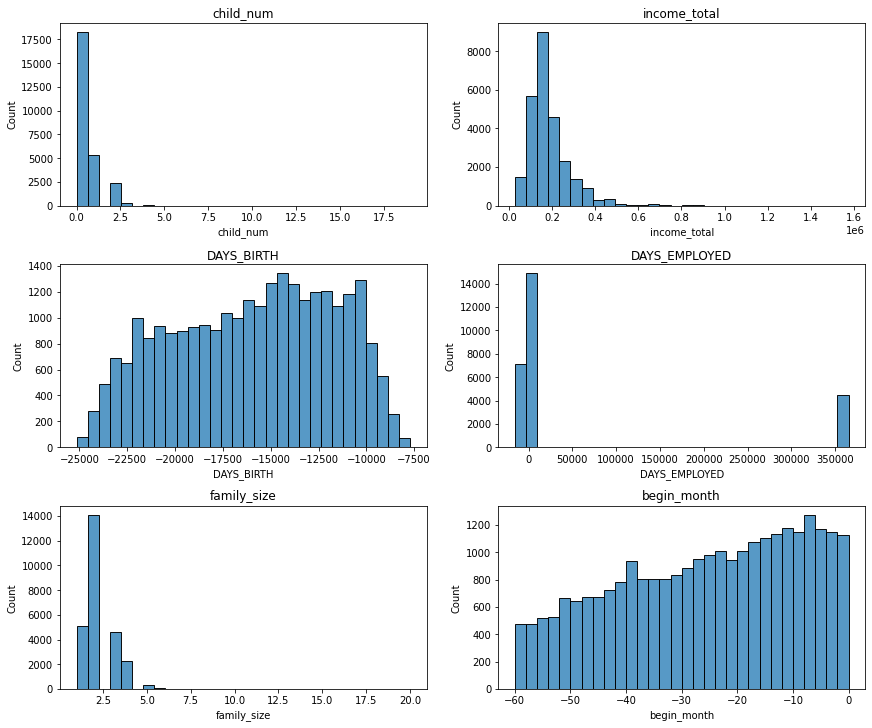

In [33]:
fig, ax = plt.subplots(3,2, figsize=(12,10), constrained_layout=True)
count = 0
for row in range(3):
    for col in range(2):
        if count == len(numeric): break
        sns.histplot(train[numeric[count]], bins=30,ax=ax[row][col])
        ax[row][col].set_title(numeric[count])
        count+=1
plt.show()

- `child_num`의 경우 대부분이 5 미만의 수를 보여주고 있었는데 몇몇 이상치가 존재했다.
- `DAYS_EMPLOYED`에서 미취업자의 경우 `365247`의 값이 부여되어있다.

## 목적변수

- 신용등급이 낮은 고객의 수가 월등히 많았다.

<AxesSubplot:xlabel='credit', ylabel='count'>

Text(0.5, 1.0, 'credit')

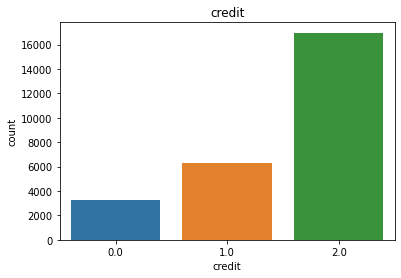

In [35]:
y = train['credit']
sns.countplot(y)
plt.title('credit')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

Text(0.5, 1.0, 'gender')

<AxesSubplot:xlabel='car', ylabel='count'>

Text(0.5, 1.0, 'car')

<AxesSubplot:xlabel='reality', ylabel='count'>

Text(0.5, 1.0, 'reality')

<AxesSubplot:xlabel='FLAG_MOBIL', ylabel='count'>

Text(0.5, 1.0, 'FLAG_MOBIL')

<AxesSubplot:xlabel='work_phone', ylabel='count'>

Text(0.5, 1.0, 'work_phone')

<AxesSubplot:xlabel='phone', ylabel='count'>

Text(0.5, 1.0, 'phone')

<AxesSubplot:xlabel='email', ylabel='count'>

Text(0.5, 1.0, 'email')

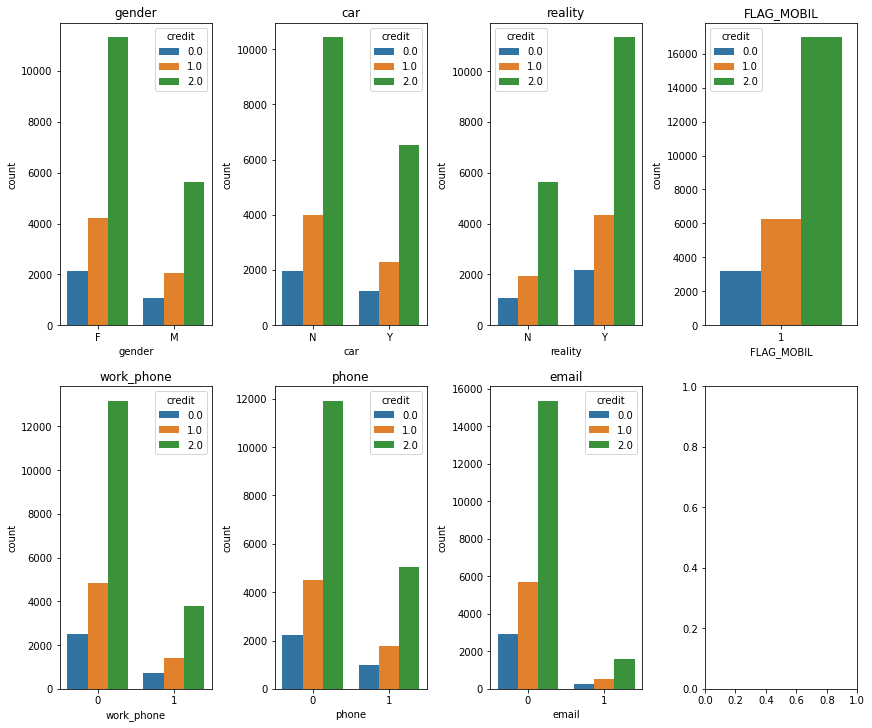

In [74]:
fig, ax = plt.subplots(2,4, figsize=(12,10), constrained_layout=True)
count = 0
for row in range(2):
    for col in range(4):
        if count == len(few_catogries): break
        sns.countplot(train[few_catogries[count]],hue=train['credit'], ax=ax[row][col])
        ax[row][col].set_title(few_catogries[count])
        count += 1
plt.show()

In [ ]:
sub.head()

# 결측치 채우기

In [36]:
missing = train[train['occyp_type'].isna()]
missing

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


### 범주형 변수별 신용도

In [37]:
for cat in categoric:
    if cat == 'occyp_type':continue
    print(cat)
    pd.crosstab(missing[cat],missing['credit'],margins=True).style.background_gradient(cmap='PuBuGn')

gender


credit,0.0,1.0,2.0,All
gender,,,,
F,760,1479,4110,6349
M,207,459,1156,1822
All,967,1938,5266,8171


car


credit,0.0,1.0,2.0,All
car,,,,
N,711,1369,3720,5800
Y,256,569,1546,2371
All,967,1938,5266,8171


reality


credit,0.0,1.0,2.0,All
reality,,,,
N,252,545,1562,2359
Y,715,1393,3704,5812
All,967,1938,5266,8171


income_type


credit,0.0,1.0,2.0,All
income_type,,,,
Commercial associate,115,225,686,1026
Pensioner,536,1084,2820,4440
State servant,52,82,258,392
Student,0,0,1,1
Working,264,547,1501,2312
All,967,1938,5266,8171


edu_type


credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,0,2,11,13
Higher education,257,492,1225,1974
Incomplete higher,27,74,199,300
Lower secondary,14,28,82,124
Secondary / secondary special,669,1342,3749,5760
All,967,1938,5266,8171


family_type


credit,0.0,1.0,2.0,All
family_type,,,,
Civil marriage,89,168,310,567
Married,602,1237,3616,5455
Separated,61,99,308,468
Single / not married,132,241,613,986
Widow,83,193,419,695
All,967,1938,5266,8171


house_type


credit,0.0,1.0,2.0,All
house_type,,,,
Co-op apartment,2,1,5,8
House / apartment,906,1744,4891,7541
Municipal apartment,20,56,155,231
Office apartment,2,9,32,43
Rented apartment,9,57,40,106
With parents,28,71,143,242
All,967,1938,5266,8171


FLAG_MOBIL


credit,0.0,1.0,2.0,All
FLAG_MOBIL,,,,
1,967,1938,5266,8171
All,967,1938,5266,8171


work_phone


credit,0.0,1.0,2.0,All
work_phone,,,,
0,861,1711,4631,7203
1,106,227,635,968
All,967,1938,5266,8171


phone


credit,0.0,1.0,2.0,All
phone,,,,
0,655,1420,3649,5724
1,312,518,1617,2447
All,967,1938,5266,8171


email


credit,0.0,1.0,2.0,All
email,,,,
0,907,1821,4915,7643
1,60,117,351,528
All,967,1938,5266,8171


- 직업이 `nan`인 샘플을 분석해보면
- 전반적으로 신용도가 낮은(1,2) 사람이 많았다.
- 성별은 여성이 남성에 비해 월등히 많았다.
- 부동산은 소유한 사람이 더 많았다.
- 소득 유형은 전체 데이터의 절반 이상이 연금 수령자 `Pensioner`였다. -> 아예 연금수령자 컬럼을 만들어 주는 것도 좋을 듯
- 근로중인 사람과 `Commercial associate`도 꽤 존재했다.
- 